# Quantium- Internship Task: 1

We need to present a strategic recommendation to Julia that is supported by data which she can then use for the upcoming category review however to do so we need to analyse the data to understand the current purchasing trends and behaviours. The client is particularly interested in customer segments and their chip purchasing behaviour. Consider what metrics would help describe the customers’ purchasing behaviour.

In [123]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [124]:
pur_bhvr = pd.read_csv("QVI_purchase_behaviour.csv")
pur_bhvr.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [125]:
tran_data = pd.read_excel("QVI_transaction_data.xlsx")
tran_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [126]:
merged_data = pd.merge(pur_bhvr, tran_data, on="LYLTY_CARD_NBR", how="right")
merged_data.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,1000,YOUNG SINGLES/COUPLES,Premium,43390,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,1307,MIDAGE SINGLES/COUPLES,Budget,43599,1,348,66,CCs Nacho Cheese 175g,3,6.3
2,1343,MIDAGE SINGLES/COUPLES,Budget,43605,1,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2373,MIDAGE SINGLES/COUPLES,Budget,43329,2,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2426,MIDAGE SINGLES/COUPLES,Budget,43330,2,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [127]:
print(len(merged_data))
print(len(tran_data))

264836
264836


In [128]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   LYLTY_CARD_NBR    264836 non-null  int64  
 1   LIFESTAGE         264836 non-null  object 
 2   PREMIUM_CUSTOMER  264836 non-null  object 
 3   DATE              264836 non-null  int64  
 4   STORE_NBR         264836 non-null  int64  
 5   TXN_ID            264836 non-null  int64  
 6   PROD_NBR          264836 non-null  int64  
 7   PROD_NAME         264836 non-null  object 
 8   PROD_QTY          264836 non-null  int64  
 9   TOT_SALES         264836 non-null  float64
dtypes: float64(1), int64(6), object(3)
memory usage: 20.2+ MB


In [129]:
from datetime import date, timedelta
start = date(1899,12,30)

new_date_format = []

for date in merged_data["DATE"]:
    delta = timedelta(date)
    new_date_format.append(start + delta)

In [130]:
merged_data["DATE"] = pd.to_datetime(pd.Series(new_date_format))
print(merged_data["DATE"].dtype)

datetime64[ns]


Next, checking the prod_name column to make sure all items are chips 

In [131]:
merged_data["PROD_NAME"].unique()

array(['Natural Chip        Compny SeaSalt175g',
       'CCs Nacho Cheese    175g',
       'Smiths Crinkle Cut  Chips Chicken 170g',
       'Smiths Chip Thinly  S/Cream&Onion 175g',
       'Kettle Tortilla ChpsHny&Jlpno Chili 150g',
       'Old El Paso Salsa   Dip Tomato Mild 300g',
       'Smiths Crinkle Chips Salt & Vinegar 330g',
       'Grain Waves         Sweet Chilli 210g',
       'Doritos Corn Chip Mexican Jalapeno 150g',
       'Grain Waves Sour    Cream&Chives 210G',
       'Kettle Sensations   Siracha Lime 150g',
       'Twisties Cheese     270g', 'WW Crinkle Cut      Chicken 175g',
       'Thins Chips Light&  Tangy 175g', 'CCs Original 175g',
       'Burger Rings 220g', 'NCC Sour Cream &    Garden Chives 175g',
       'Doritos Corn Chip Southern Chicken 150g',
       'Cheezels Cheese Box 125g', 'Smiths Crinkle      Original 330g',
       'Infzns Crn Crnchers Tangy Gcamole 110g',
       'Kettle Sea Salt     And Vinegar 175g',
       'Smiths Chip Thinly  Cut Original 175g', 'K

In [132]:
split_prods = merged_data["PROD_NAME"].str.replace(r'\s*\d+[gG]', '', regex=True).str.replace(r'[^\w]', ' ', regex=True).str.split()

# Display the result
split_prods

0                  [Natural, Chip, Compny, SeaSalt]
1                              [CCs, Nacho, Cheese]
2            [Smiths, Crinkle, Cut, Chips, Chicken]
3           [Smiths, Chip, Thinly, S, Cream, Onion]
4         [Kettle, Tortilla, ChpsHny, Jlpno, Chili]
                            ...                    
264831    [Kettle, Sweet, Chilli, And, Sour, Cream]
264832                 [Tostitos, Splash, Of, Lime]
264833                          [Doritos, Mexicana]
264834     [Doritos, Corn, Chip, Mexican, Jalapeno]
264835                 [Tostitos, Splash, Of, Lime]
Name: PROD_NAME, Length: 264836, dtype: object

In [133]:
split_prods

0                  [Natural, Chip, Compny, SeaSalt]
1                              [CCs, Nacho, Cheese]
2            [Smiths, Crinkle, Cut, Chips, Chicken]
3           [Smiths, Chip, Thinly, S, Cream, Onion]
4         [Kettle, Tortilla, ChpsHny, Jlpno, Chili]
                            ...                    
264831    [Kettle, Sweet, Chilli, And, Sour, Cream]
264832                 [Tostitos, Splash, Of, Lime]
264833                          [Doritos, Mexicana]
264834     [Doritos, Corn, Chip, Mexican, Jalapeno]
264835                 [Tostitos, Splash, Of, Lime]
Name: PROD_NAME, Length: 264836, dtype: object

In [134]:
word_counts = {}

def count_words(line):
    for word in line:
        if word not in word_counts:
            word_counts[word] = 1
        else:
            word_counts[word] += 1
            
split_prods.apply(lambda line: count_words(line))
print(pd.Series(word_counts).sort_values(ascending=False))

Chips       49770
Kettle      41288
Smiths      28860
Salt        27976
Cheese      27890
            ...  
Sunbites     1432
Pc           1431
Garden       1419
NCC          1419
Fries        1418
Length: 198, dtype: int64


In [135]:
merged_data = merged_data[~merged_data["PROD_NAME"].str.contains(r"[Ss]alsa")] 

In [136]:
print(merged_data.describe(), '\n')
print(merged_data.info()) 

       LYLTY_CARD_NBR                           DATE      STORE_NBR  \
count    2.467420e+05                         246742  246742.000000   
mean     1.355310e+05  2018-12-30 01:19:01.211467520     135.051098   
min      1.000000e+03            2018-07-01 00:00:00       1.000000   
25%      7.001500e+04            2018-09-30 00:00:00      70.000000   
50%      1.303670e+05            2018-12-30 00:00:00     130.000000   
75%      2.030840e+05            2019-03-31 00:00:00     203.000000   
max      2.373711e+06            2019-06-30 00:00:00     272.000000   
std      8.071528e+04                            NaN      76.787096   

             TXN_ID       PROD_NBR       PROD_QTY      TOT_SALES  
count  2.467420e+05  246742.000000  246742.000000  246742.000000  
mean   1.351311e+05      56.351789       1.908062       7.321322  
min    1.000000e+00       1.000000       1.000000       1.700000  
25%    6.756925e+04      26.000000       2.000000       5.800000  
50%    1.351830e+05      

In [137]:
merged_data["PROD_QTY"].value_counts(bins=4).sort_index()

PROD_QTY
(0.8, 50.75]       246740
(50.75, 100.5]          0
(100.5, 150.25]         0
(150.25, 200.0]         2
Name: count, dtype: int64

From the binning above we see that PROD_QTY values above 50.75

In [138]:
merged_data.sort_values(by="PROD_QTY", ascending=False).head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69763,226000,OLDER FAMILIES,Premium,2019-05-20,226,226210,4,Dorito Corn Chp Supreme 380g,200,650.0
69762,226000,OLDER FAMILIES,Premium,2018-08-19,226,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
135225,46296,RETIREES,Budget,2019-05-15,46,42138,81,Pringles Original Crisps 134g,5,18.5
69523,71142,OLDER FAMILIES,Premium,2019-05-15,71,69852,96,WW Original Stacked Chips 160g,5,9.5
69502,55144,OLDER FAMILIES,Premium,2018-08-18,55,49328,44,Thins Chips Light& Tangy 175g,5,16.5


2 outliers (value = 200) in PROD_QTY will be removed. Both entries are by the same customer, we will examine this customer's other transactions.

In [139]:
merged_data = merged_data[merged_data["PROD_QTY"] < 6]

In [140]:
len(merged_data[merged_data["LYLTY_CARD_NBR"] == 226000])

0

In [141]:
merged_data["DATE"].describe()

count                           246740
mean     2018-12-30 01:18:58.448569344
min                2018-07-01 00:00:00
25%                2018-09-30 00:00:00
50%                2018-12-30 00:00:00
75%                2019-03-31 00:00:00
max                2019-06-30 00:00:00
Name: DATE, dtype: object

In [142]:
merged_data["DATE"].nunique()

364

Instead of 365, the DATE column only has 364 unique values. 1 is missing.

In [143]:
pd.date_range(start=merged_data["DATE"].min(), end=merged_data["DATE"].max()).difference(merged_data["DATE"])

DatetimeIndex(['2018-12-25'], dtype='datetime64[ns]', freq=None)

Using the difference method we see that 2018-12-25 was the missing date.

In [144]:
check_null_date = pd.merge(pd.Series(pd.date_range(start=merged_data["DATE"].min(), end=merged_data["DATE"].max()), name="DATE"), merged_data, on="DATE", how="left")

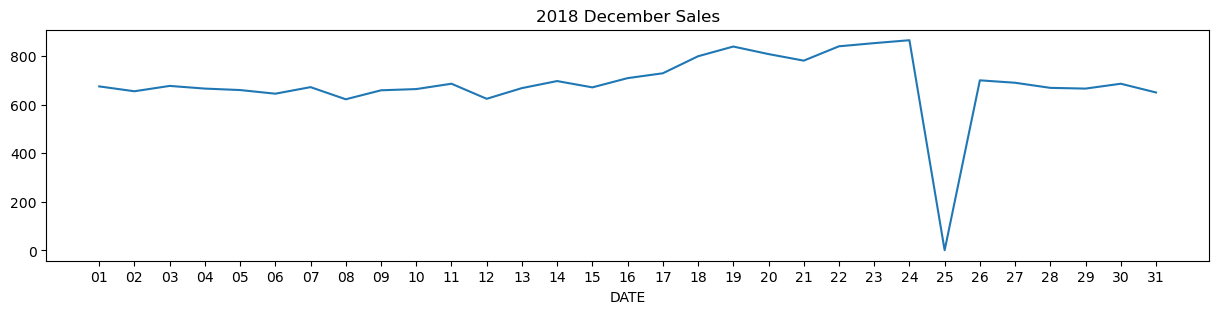

In [145]:
trans_by_date = check_null_date["DATE"].value_counts()
dec = trans_by_date[(trans_by_date.index >= pd.to_datetime('2018-12-1')) & (trans_by_date.index < pd.to_datetime('2019-1-1'))].sort_index()
dec.index = dec.index.strftime('%d')
ax = dec.plot(figsize=(15,3))
ax.set_xticks(np.arange(len(dec)))
ax.set_xticklabels(dec.index)
plt.title("2018 December Sales")
plt.savefig("2018 December Sales.png", bbox_inches="tight")
plt.show() 

In [146]:
check_null_date["DATE"].value_counts().sort_values().head()

DATE
2018-12-25      1
2019-06-13    607
2018-09-22    609
2018-11-25    610
2018-10-18    611
Name: count, dtype: int64

The date with the no transaction falls on Christmas day, the day when the store is closed. Knowing there's no anomaly in this, we leave it be.

Next, we'll explore product pack sizes

In [147]:
# Assuming merge_df is your DataFrame
merged_data["PROD_NAME"] = merged_data["PROD_NAME"].str.replace(r'[0-9]+(G)','g')

# Extract pack sizes using regex and replace 'g' with ''
pack_sizes = merged_data["PROD_NAME"].str.extract(r'([0-9]+)g', expand=False).str.replace("g","")

# Convert pack sizes to float
pack_sizes = pack_sizes.astype("float")

# Print the first few values to verify the conversion
pack_sizes.head() 

0    175.0
1    175.0
2    170.0
3    175.0
4    150.0
Name: PROD_NAME, dtype: float64

In [148]:
pack_sizes.describe()

count    240676.000000
mean        175.302286
std          60.014468
min          70.000000
25%         150.000000
50%         170.000000
75%         175.000000
max         380.000000
Name: PROD_NAME, dtype: float64

<Axes: ylabel='Frequency'>

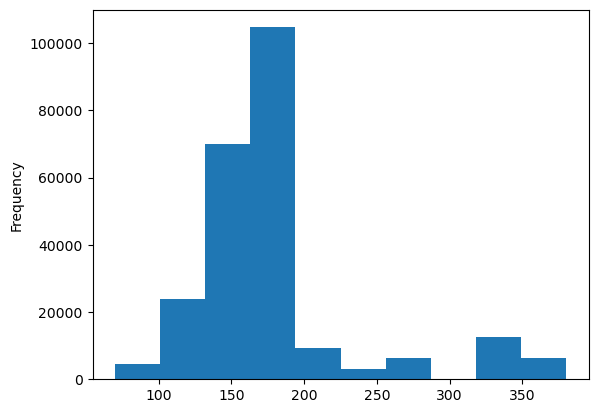

In [149]:
pack_sizes.plot.hist()

Product pack size looks reasonable with highest transaction frequency in mid-sized pack. Smallest size is 70g, and biggest size is 380g.

Next, we will explore the product brand names

In [150]:
merged_data["PROD_NAME"].str.split().str[0].value_counts().sort_index()

PROD_NAME
Burger         1564
CCs            4551
Cheetos        2927
Cheezels       4603
Cobs           9693
Dorito         3183
Doritos       22041
French         1418
Grain          6272
GrnWves        1468
Infuzions     11057
Infzns         3144
Kettle        41288
NCC            1419
Natural        6050
Pringles      25102
RRD           11894
Red            4427
Smith          2963
Smiths        27390
Snbts          1576
Sunbites       1432
Thins         14075
Tostitos       9471
Twisties       9454
Tyrrells       6442
WW            10320
Woolworths     1516
Name: count, dtype: int64

As we look further than the first word in product name, we can see that some product brands are written in more than 1 way. Dorito and Doritos. Grain and GrnWves. Infuzions and Infzns. Natural and NCC. Red and RRD. Smith and Smiths. Snbts and Sunbites. WW and Woolworths.

In [151]:
merged_data["PROD_NAME"].str.split()[merged_data["PROD_NAME"].str.split().str[0] == "Grain"].value_counts()

PROD_NAME
[Grain, Waves, Sweet, Chilli, 210g]         3167
[Grain, Waves, Sour, Cream&Chives, 210G]    3105
Name: count, dtype: int64

In [152]:
merged_data["PROD_NAME"].str.split()[merged_data["PROD_NAME"].str.split().str[0] == "Natural"].value_counts()

PROD_NAME
[Natural, Chip, Co, Tmato, Hrb&Spce, 175g]       1572
[Natural, ChipCo, Sea, Salt, &, Vinegr, 175g]    1550
[Natural, Chip, Compny, SeaSalt175g]             1468
[Natural, ChipCo, Hony, Soy, Chckn175g]          1460
Name: count, dtype: int64

In [153]:
merged_data["PROD_NAME"].str.split()[merged_data["PROD_NAME"].str.split().str[0] == "Red"].value_counts()

PROD_NAME
[Red, Rock, Deli, Sp, Salt, &, Truffle, 150G]    1498
[Red, Rock, Deli, Thai, Chilli&Lime, 150g]       1495
[Red, Rock, Deli, Chikn&Garlic, Aioli, 150g]     1434
Name: count, dtype: int64

In [154]:
merged_data["Cleaned_Brand_Names"] = merged_data["PROD_NAME"].str.split().str[0]

In [155]:
def clean_brand_names(line):
    brand = line["Cleaned_Brand_Names"]
    if brand == "Dorito":
        return "Doritos"
    elif brand == "GrnWves" or brand == "Grain":
        return "Grain Waves"
    elif brand == "Infzns":
        return "Infuzions"
    elif brand == "Natural" or brand == "NCC":
        return "Natural Chip Co"
    elif brand == "Red":
        return "RRD"
    elif brand == "Smith":
        return "Smiths"
    elif brand == "Snbts":
        return "Sunbites"
    elif brand == "WW":
        return "Woolworths"
    else:
        return brand 

In [156]:
merged_data["Cleaned_Brand_Names"] = merged_data.apply(lambda line: clean_brand_names(line), axis=1)

<Axes: ylabel='Cleaned_Brand_Names'>

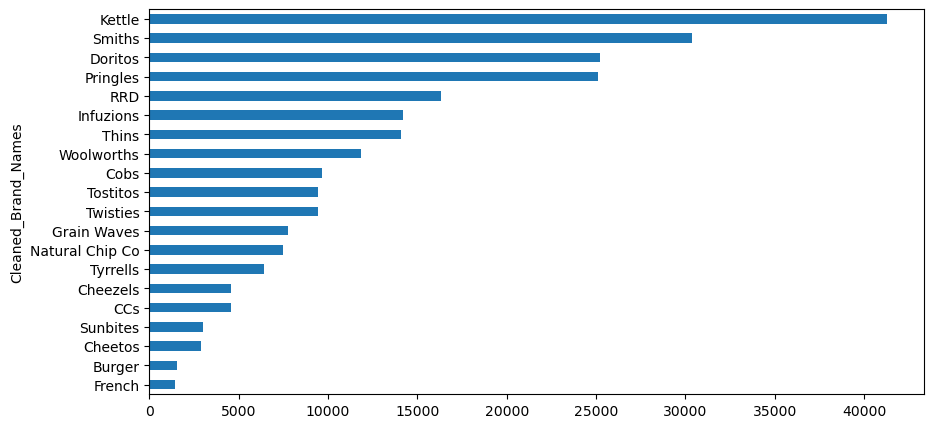

In [157]:
merged_data["Cleaned_Brand_Names"].value_counts(ascending=True).plot.barh(figsize=(10,5)) 

In [158]:
merged_data.isnull().sum()

LYLTY_CARD_NBR         0
LIFESTAGE              0
PREMIUM_CUSTOMER       0
DATE                   0
STORE_NBR              0
TXN_ID                 0
PROD_NBR               0
PROD_NAME              0
PROD_QTY               0
TOT_SALES              0
Cleaned_Brand_Names    0
dtype: int64

- Who spends the most on chips (total sales), describing customers by lifestage and how premium their general purchasing behaviour is
- How many customers are in each segment
- How many chips are bought per customer by segment
- What's the average chip price by customer segment

In [159]:
grouped_sales = pd.DataFrame(merged_data.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"])["TOT_SALES"].agg(["sum", "mean"]))
grouped_sales.sort_values(ascending=False, by="sum")

sum      mean
LIFESTAGE              PREMIUM_CUSTOMER                     
OLDER FAMILIES         Budget            156863.75  7.291241
YOUNG SINGLES/COUPLES  Mainstream        147582.20  7.551279
RETIREES               Mainstream        145168.95  7.269352
YOUNG FAMILIES         Budget            129717.95  7.302705
OLDER SINGLES/COUPLES  Budget            127833.60  7.444305
                       Mainstream        124648.50  7.306049
                       Premium           123537.55  7.459997
RETIREES               Budget            105916.30  7.445786
OLDER FAMILIES         Mainstream         96413.55  7.281440
RETIREES               Premium            91296.65  7.461315
YOUNG FAMILIES         Mainstream         86338.25  7.226772
MIDAGE SINGLES/COUPLES Mainstream         84734.25  7.637156
YOUNG FAMILIES         Premium            78571.70  7.285951
OLDER FAMILIES         Premium            75242.60  7.232779
YOUNG SINGLES/COUPLES  Budget             57122.10  6.663023
MIDAGE SINGLES/COUPLES Premium            54443.85  7.152371
YOUNG SINGLES/COUPLES  Premium            39052.30  6.673325
MIDAGE SINGLES/COUPLES Budget             33345.70  7.108442
NEW FAMILIES           Budget             20607.45  7.297256
                       Mainstream         15979.70  7.313364
                       Premium            10760.80  7.231720

In [160]:
grouped_sales["sum"].sum()

1805177.7

<Axes: ylabel='LIFESTAGE,PREMIUM_CUSTOMER'>

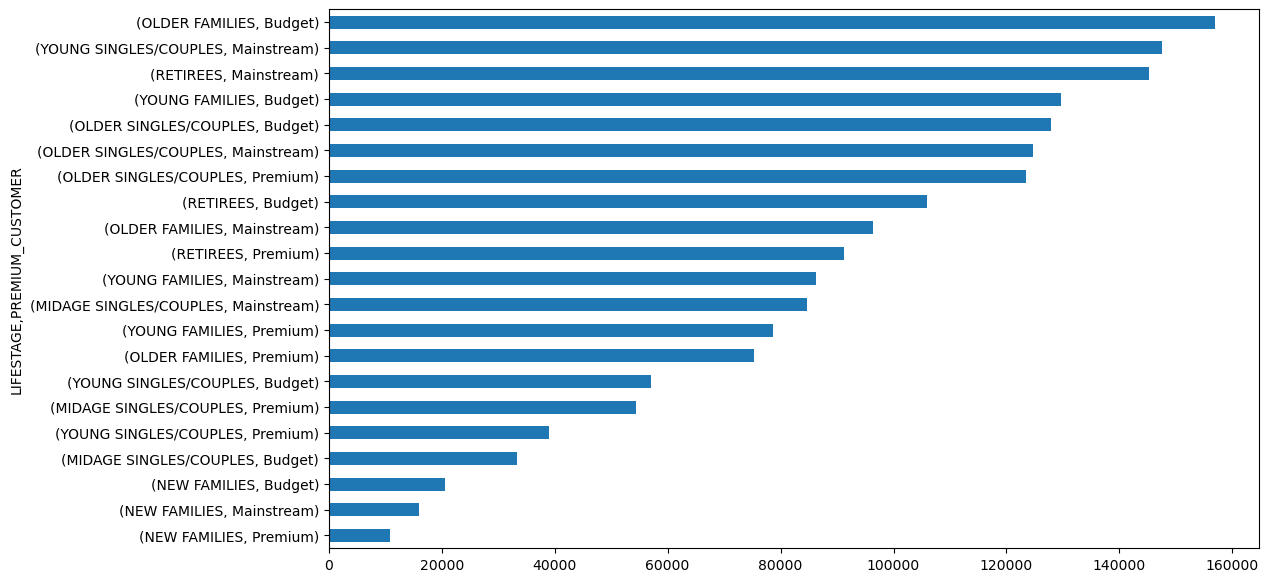

In [161]:
grouped_sales["sum"].sort_values().plot.barh(figsize=(12,7))

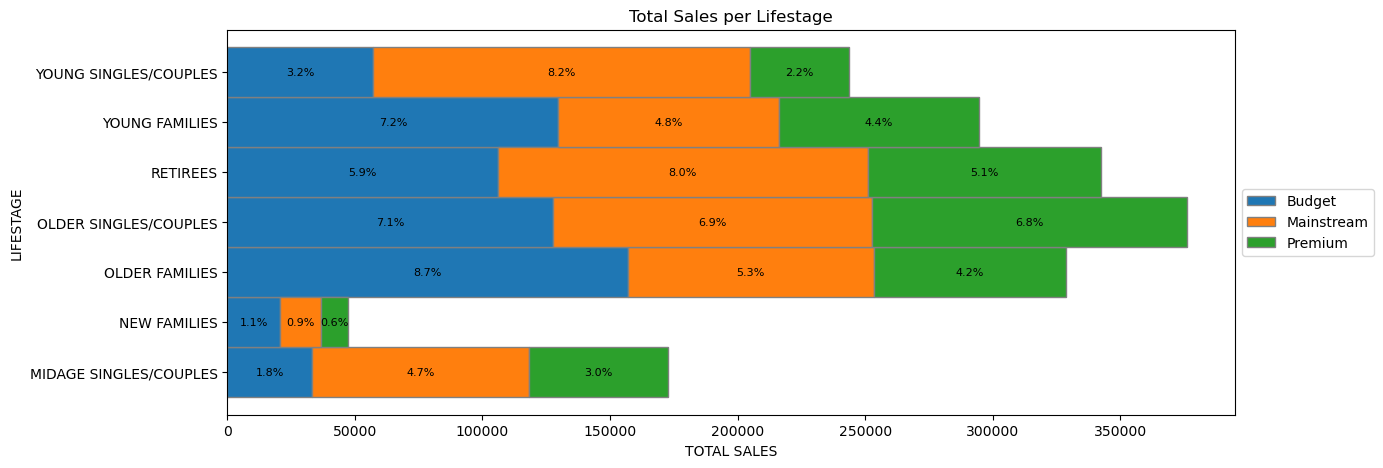

In [162]:
#grouped_sales.set_index(['PREMIUM_CUSTOMER', 'LIFESTAGE'], inplace=True)

# Extracting data for each bar group
bars1 = grouped_sales.xs('Budget', level='PREMIUM_CUSTOMER')['sum']
bars2 = grouped_sales.xs('Mainstream', level='PREMIUM_CUSTOMER')['sum']
bars3 = grouped_sales.xs('Premium', level='PREMIUM_CUSTOMER')['sum']

# Calculating the text labels for each bar
total_sum = grouped_sales['sum'].sum()
bars1_text = (bars1 / total_sum).apply("{:.1%}".format)
bars2_text = (bars2 / total_sum).apply("{:.1%}".format)
bars3_text = (bars3 / total_sum).apply("{:.1%}".format)

# Extracting unique lifestage names
names = grouped_sales.index.get_level_values("LIFESTAGE").unique()

# The position of the bars on the y-axis
r = np.arange(len(names))

plt.figure(figsize=(13, 5))

# Create the horizontal bar plot for Budget
budget_bar = plt.barh(r, bars1, edgecolor='grey', height=1, label="Budget")

# Calculate the left positions for Mainstream bars
mains_left = bars1
mains_bar = plt.barh(r, bars2, left=mains_left, edgecolor='grey', height=1, label="Mainstream")

# Calculate the left positions for Premium bars
prem_left = mains_left + bars2
prem_bar = plt.barh(r, bars3, left=prem_left, edgecolor='grey', height=1, label="Premium")

# Annotate bars with percentage text
for i in range(len(r)):
    budget_width = budget_bar[i].get_width()
    mains_width = mains_bar[i].get_width()
    prem_width = prem_bar[i].get_width()
    
    plt.text(budget_width / 2, i, bars1_text[i], va='center', ha='center', size=8)
    plt.text(budget_width + mains_width / 2, i, bars2_text[i], va='center', ha='center', size=8)
    plt.text(budget_width + mains_width + prem_width / 2, i, bars3_text[i], va='center', ha='center', size=8)

# Custom Y axis
plt.yticks(r, names)
plt.ylabel("LIFESTAGE")
plt.xlabel("TOTAL SALES")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

plt.title("Total Sales per Lifestage")

# Save and show the plot
plt.savefig("lifestage_sales.png", bbox_inches="tight")
plt.show() 

In [163]:
stage_agg_prem = merged_data.groupby("LIFESTAGE")["PREMIUM_CUSTOMER"].agg(pd.Series.mode).sort_values()
print("Top contributor per LIFESTAGE by PREMIUM category")
print(stage_agg_prem)

Top contributor per LIFESTAGE by PREMIUM category
LIFESTAGE
NEW FAMILIES                  Budget
OLDER FAMILIES                Budget
OLDER SINGLES/COUPLES         Budget
YOUNG FAMILIES                Budget
MIDAGE SINGLES/COUPLES    Mainstream
RETIREES                  Mainstream
YOUNG SINGLES/COUPLES     Mainstream
Name: PREMIUM_CUSTOMER, dtype: object


In [164]:
# Group by 'LIFESTAGE' and 'PREMIUM_CUSTOMER' and count unique 'LYLTY_CARD_NBR'
unique_cust = merged_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['LYLTY_CARD_NBR'].nunique().reset_index()

# Sort values by 'LYLTY_CARD_NBR' in descending order
unique_cust = unique_cust.sort_values(by='LYLTY_CARD_NBR', ascending=False)

# Add 'CUSTOMER_COUNT' column based on counts
unique_cust['CUSTOMER_COUNT'] = unique_cust['LYLTY_CARD_NBR']  # Assuming you want to copy 'LYLTY_CARD_NBR' counts

# Now 'unique_cust' DataFrame should have 'CUSTOMER_COUNT' column
unique_cust 

,LIFESTAGE,PREMIUM_CUSTOMER,LYLTY_CARD_NBR,CUSTOMER_COUNT
19,YOUNG SINGLES/COUPLES,Mainstream,7917,7917
13,RETIREES,Mainstream,6358,6358
10,OLDER SINGLES/COUPLES,Mainstream,4858,4858
9,OLDER SINGLES/COUPLES,Budget,4849,4849
11,OLDER SINGLES/COUPLES,Premium,4682,4682
6,OLDER FAMILIES,Budget,4611,4611
12,RETIREES,Budget,4385,4385
15,YOUNG FAMILIES,Budget,3953,3953
14,RETIREES,Premium,3812,3812
18,YOUNG SINGLES/COUPLES,Budget,3647,3647


The top 3 total sales contributor segment are (in order):

- Older families (Budget) $156,864

- Young Singles/Couples (Mainstream) $147,582

- Retirees (Mainstream) $145,169 

In [165]:
unique_cust

,LIFESTAGE,PREMIUM_CUSTOMER,LYLTY_CARD_NBR,CUSTOMER_COUNT
19,YOUNG SINGLES/COUPLES,Mainstream,7917,7917
13,RETIREES,Mainstream,6358,6358
10,OLDER SINGLES/COUPLES,Mainstream,4858,4858
9,OLDER SINGLES/COUPLES,Budget,4849,4849
11,OLDER SINGLES/COUPLES,Premium,4682,4682
6,OLDER FAMILIES,Budget,4611,4611
12,RETIREES,Budget,4385,4385
15,YOUNG FAMILIES,Budget,3953,3953
14,RETIREES,Premium,3812,3812
18,YOUNG SINGLES/COUPLES,Budget,3647,3647


<Figure size 1200x700 with 0 Axes>

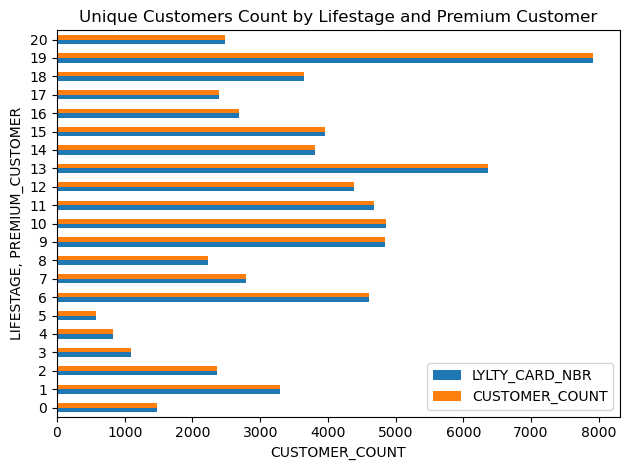

In [166]:
unique_cust = unique_cust.sort_index()

plt.figure(figsize=(12, 7))
bars = unique_cust.plot.barh()

# Customize the plot
plt.xlabel('CUSTOMER_COUNT')
plt.ylabel('LIFESTAGE, PREMIUM_CUSTOMER')  # Adjusted y-axis label
plt.title('Unique Customers Count by Lifestage and Premium Customer')
plt.tight_layout()

# Show the plot
plt.show()

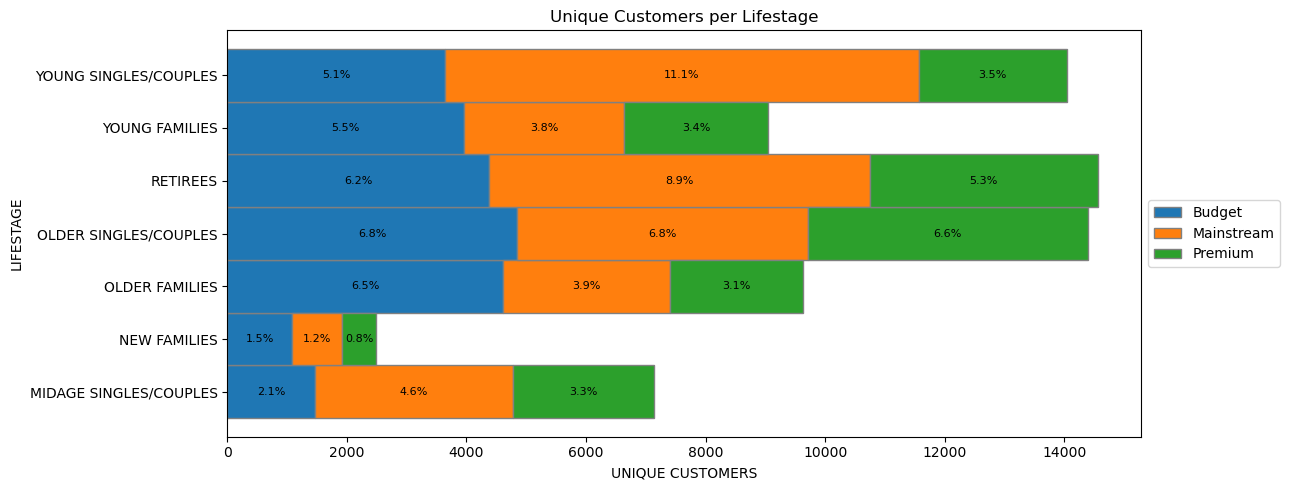

In [167]:
# Calculate the total unique customers
total_unique_cust = unique_cust['CUSTOMER_COUNT'].sum()

# Extract data for each PREMIUM_CUSTOMER group
ncust_bars1 = unique_cust[unique_cust['PREMIUM_CUSTOMER'] == 'Budget']['CUSTOMER_COUNT']
ncust_bars2 = unique_cust[unique_cust['PREMIUM_CUSTOMER'] == 'Mainstream']['CUSTOMER_COUNT']
ncust_bars3 = unique_cust[unique_cust['PREMIUM_CUSTOMER'] == 'Premium']['CUSTOMER_COUNT']

# Calculate the percentage text for each bar
ncust_bars1_text = (ncust_bars1 / total_unique_cust).apply("{:.1%}".format)
ncust_bars2_text = (ncust_bars2 / total_unique_cust).apply("{:.1%}".format)
ncust_bars3_text = (ncust_bars3 / total_unique_cust).apply("{:.1%}".format)

# Get the unique LIFESTAGE names
names = unique_cust['LIFESTAGE'].unique()

# The position of the bars on the y-axis
r = np.arange(len(names))

plt.figure(figsize=(13, 5))

# Create the horizontal bar plot for Budget
budget_bar = plt.barh(r, ncust_bars1, edgecolor='grey', height=1, label="Budget")

# Calculate the left positions for Mainstream bars
mains_bar = plt.barh(r, ncust_bars2, left=ncust_bars1, edgecolor='grey', height=1, label="Mainstream")

# Calculate the left positions for Premium bars
prem_left = np.where(np.isnan(ncust_bars1), 0, ncust_bars1) + np.where(np.isnan(ncust_bars2), 0, ncust_bars2)
prem_bar = plt.barh(r, ncust_bars3, left=prem_left, edgecolor='grey', height=1, label="Premium")

# Annotate bars with percentage text
for i in range(len(r)):
    budget_width = budget_bar[i].get_width()
    mains_width = mains_bar[i].get_width()
    prem_width = prem_bar[i].get_width()
    
    plt.text(budget_width / 2, i, ncust_bars1_text.iloc[i], va='center', ha='center', size=8)
    plt.text(budget_width + mains_width / 2, i, ncust_bars2_text.iloc[i], va='center', ha='center', size=8)
    plt.text(budget_width + mains_width + prem_width / 2, i, ncust_bars3_text.iloc[i], va='center', ha='center', size=8)

# Custom Y axis
plt.yticks(r, names)
plt.ylabel("LIFESTAGE")
plt.xlabel("UNIQUE CUSTOMERS")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

plt.title("Unique Customers per Lifestage")

# Save and show the plot
plt.tight_layout()
plt.savefig("lifestage_customers.png", bbox_inches="tight")
plt.show()


The high sales amount by segment "Young Singles/Couples - Mainstream" and "Retirees - Mainstream" are due to their large number of unique customers, but not for the "Older - Budget" segment. Next we'll explore if the "Older - Budget" segment has:

High Frequency of Purchase and,
Average Sales per Customer compared to the other segment.

In [168]:
freq_per_cust = merged_data.groupby(["LYLTY_CARD_NBR", "LIFESTAGE", "PREMIUM_CUSTOMER"]).count()["DATE"]
freq_per_cust.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"]).agg(["mean", "count"]).sort_values(ascending=False, by="mean")


mean  count
LIFESTAGE              PREMIUM_CUSTOMER                 
OLDER FAMILIES         Mainstream        4.749283   2788
                       Budget            4.665799   4611
                       Premium           4.662931   2231
YOUNG FAMILIES         Premium           4.497081   2398
                       Budget            4.493549   3953
                       Mainstream        4.449534   2685
OLDER SINGLES/COUPLES  Budget            3.541349   4849
                       Premium           3.536950   4682
                       Mainstream        3.511939   4858
MIDAGE SINGLES/COUPLES Mainstream        3.364160   3298
RETIREES               Budget            3.244014   4385
MIDAGE SINGLES/COUPLES Premium           3.213170   2369
RETIREES               Premium           3.209864   3812
MIDAGE SINGLES/COUPLES Budget            3.182497   1474
RETIREES               Mainstream        3.140925   6358
NEW FAMILIES           Mainstream        2.632530    830
                       Budget            2.597976   1087
                       Premium           2.587826    575
YOUNG SINGLES/COUPLES  Mainstream        2.468612   7917
                       Premium           2.359677   2480
                       Budget            2.350699   3647

The above table describes the "Average frequency of Purchase per segment" and "Unique customer per segment". The top three most frequent purchase is contributed by the "Older Families" lifestage segment. We can see now that the "Older - Budget" segment contributes to high sales partly because of the combination of:

- High Frequency of Purchase and,
- Fairly high unique number of customer in the segment

In [169]:
grouped_sales.sort_values(ascending=False, by="mean")

,,sum,mean
LIFESTAGE,PREMIUM_CUSTOMER,,
MIDAGE SINGLES/COUPLES,Mainstream,84734.25,7.637156
YOUNG SINGLES/COUPLES,Mainstream,147582.20,7.551279
RETIREES,Premium,91296.65,7.461315
OLDER SINGLES/COUPLES,Premium,123537.55,7.459997
RETIREES,Budget,105916.30,7.445786
OLDER SINGLES/COUPLES,Budget,127833.60,7.444305
NEW FAMILIES,Mainstream,15979.70,7.313364
OLDER SINGLES/COUPLES,Mainstream,124648.50,7.306049
YOUNG FAMILIES,Budget,129717.95,7.302705


Highest average spending per purchase are contributed by the Midage and Young "Singles/Couples". The difference between their Mainstream and Non-Mainstream group might seem insignificant (7.6 vs 6.6), but we'll find out by examining if the difference is statistically significant. 

In [170]:
from scipy.stats import ttest_ind

In [171]:
mainstream = merged_data["PREMIUM_CUSTOMER"] == "Mainstream"
young_midage = (merged_data["LIFESTAGE"] == "MIDAGE SINGLES/COUPLES") | (merged_data["LIFESTAGE"] == "YOUNG SINGLES/COUPLES")

budget_premium = (merged_data["PREMIUM_CUSTOMER"] == "Budget") | (merged_data["PREMIUM_CUSTOMER"] == "Premium")

a = merged_data[young_midage & mainstream]["TOT_SALES"]
b = merged_data[young_midage & budget_premium]["TOT_SALES"]
stat, pval = ttest_ind(a.values, b.values, equal_var=False)

print(pval)
pval < 0.0000001 

1.834645908180742e-237


True

P-Value is close to 0. There is a statistically significant difference to the Total Sales between the "Mainstream Young Midage" segment to the "Budget and Premium Young Midage" segment.

Next, let's look examine what brand of chips the top 3 segments contributing to Total Sales are buying.

In [172]:
merged_data.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"])["Cleaned_Brand_Names"].agg(pd.Series.mode).sort_values()

LIFESTAGE               PREMIUM_CUSTOMER
MIDAGE SINGLES/COUPLES  Budget              Kettle
YOUNG SINGLES/COUPLES   Budget              Kettle
YOUNG FAMILIES          Premium             Kettle
                        Mainstream          Kettle
                        Budget              Kettle
RETIREES                Premium             Kettle
                        Mainstream          Kettle
                        Budget              Kettle
OLDER SINGLES/COUPLES   Premium             Kettle
YOUNG SINGLES/COUPLES   Mainstream          Kettle
OLDER SINGLES/COUPLES   Mainstream          Kettle
OLDER FAMILIES          Premium             Kettle
                        Mainstream          Kettle
                        Budget              Kettle
NEW FAMILIES            Premium             Kettle
                        Mainstream          Kettle
                        Budget              Kettle
MIDAGE SINGLES/COUPLES  Premium             Kettle
                        Mainstream       

========== YOUNG SINGLES/COUPLES - Premium ==========
Cleaned_Brand_Names
Kettle      838
Smiths      787
Pringles    537
Name: count, dtype: int64


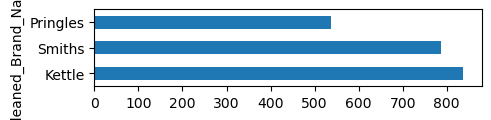

========== YOUNG SINGLES/COUPLES - Budget ==========
Cleaned_Brand_Names
Kettle      1211
Smiths      1185
Pringles     832
Name: count, dtype: int64


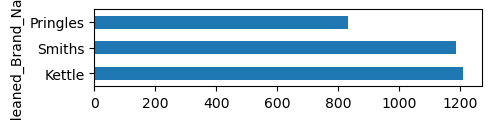

========== YOUNG SINGLES/COUPLES - Mainstream ==========
Cleaned_Brand_Names
Kettle      3844
Doritos     2379
Pringles    2315
Name: count, dtype: int64


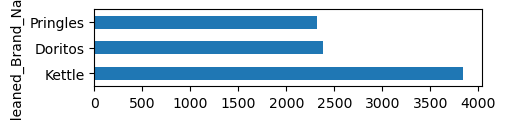

========== MIDAGE SINGLES/COUPLES - Premium ==========
Cleaned_Brand_Names
Kettle      1206
Smiths       923
Pringles     781
Name: count, dtype: int64


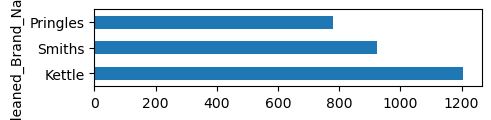

========== MIDAGE SINGLES/COUPLES - Budget ==========
Cleaned_Brand_Names
Kettle     713
Smiths     591
Doritos    479
Name: count, dtype: int64


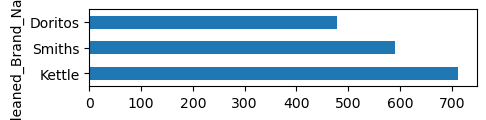

========== MIDAGE SINGLES/COUPLES - Mainstream ==========
Cleaned_Brand_Names
Kettle     2136
Smiths     1276
Doritos    1210
Name: count, dtype: int64


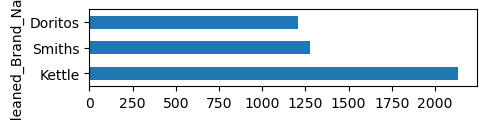

========== NEW FAMILIES - Premium ==========
Cleaned_Brand_Names
Kettle      247
Pringles    165
Smiths      155
Name: count, dtype: int64


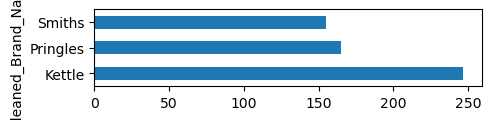

========== NEW FAMILIES - Budget ==========
Cleaned_Brand_Names
Kettle     510
Smiths     328
Doritos    315
Name: count, dtype: int64


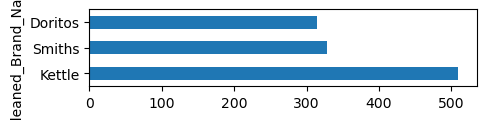

========== NEW FAMILIES - Mainstream ==========
Cleaned_Brand_Names
Kettle     414
Doritos    257
Smiths     244
Name: count, dtype: int64


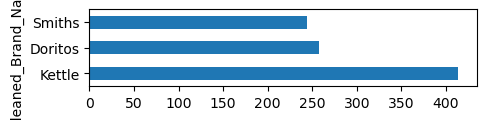

========== OLDER FAMILIES - Premium ==========
Cleaned_Brand_Names
Kettle      1512
Smiths      1448
Pringles    1014
Name: count, dtype: int64


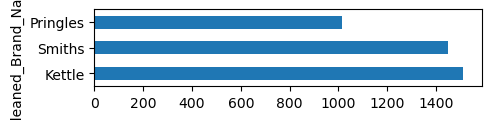

========== OLDER FAMILIES - Budget ==========
Cleaned_Brand_Names
Kettle     3320
Smiths     2948
Doritos    2032
Name: count, dtype: int64


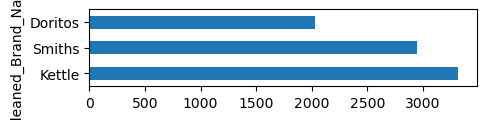

========== OLDER FAMILIES - Mainstream ==========
Cleaned_Brand_Names
Kettle     2019
Smiths     1742
Doritos    1263
Name: count, dtype: int64


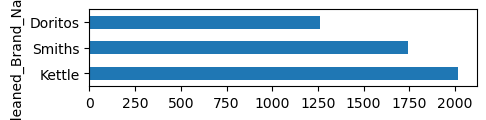

========== OLDER SINGLES/COUPLES - Premium ==========
Cleaned_Brand_Names
Kettle     2947
Smiths     1952
Doritos    1784
Name: count, dtype: int64


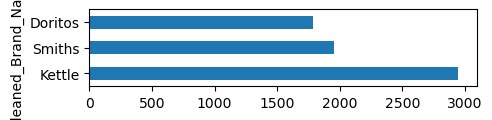

========== OLDER SINGLES/COUPLES - Budget ==========
Cleaned_Brand_Names
Kettle      3065
Smiths      2010
Pringles    1843
Name: count, dtype: int64


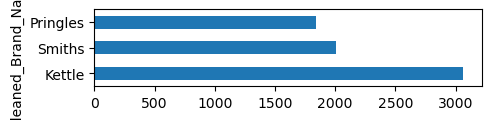

========== OLDER SINGLES/COUPLES - Mainstream ==========
Cleaned_Brand_Names
Kettle     2835
Smiths     2070
Doritos    1791
Name: count, dtype: int64


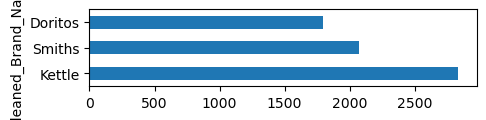

========== RETIREES - Premium ==========
Cleaned_Brand_Names
Kettle      2216
Smiths      1395
Pringles    1331
Name: count, dtype: int64


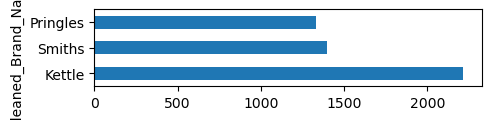

========== RETIREES - Budget ==========
Cleaned_Brand_Names
Kettle     2592
Smiths     1612
Doritos    1592
Name: count, dtype: int64


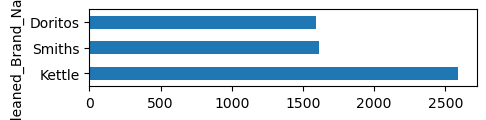

========== RETIREES - Mainstream ==========
Cleaned_Brand_Names
Kettle      3386
Smiths      2367
Pringles    2103
Name: count, dtype: int64


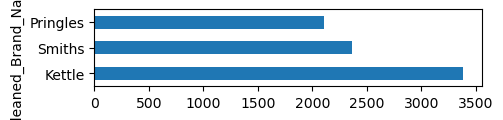

========== YOUNG FAMILIES - Premium ==========
Cleaned_Brand_Names
Kettle      1745
Smiths      1384
Pringles    1007
Name: count, dtype: int64


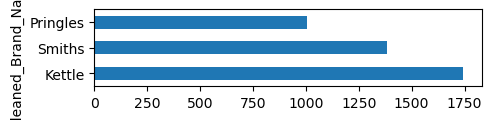

========== YOUNG FAMILIES - Budget ==========
Cleaned_Brand_Names
Kettle     2743
Smiths     2334
Doritos    1767
Name: count, dtype: int64


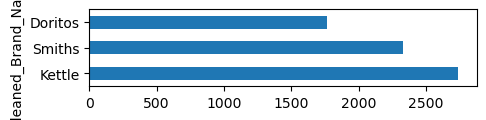

========== YOUNG FAMILIES - Mainstream ==========
Cleaned_Brand_Names
Kettle      1789
Smiths      1681
Pringles    1148
Name: count, dtype: int64


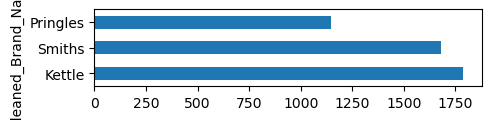

In [173]:
for stage in merged_data["LIFESTAGE"].unique():
    for prem in merged_data["PREMIUM_CUSTOMER"].unique():
        print('==========',stage, '-', prem,'==========')
        summary = merged_data[(merged_data["LIFESTAGE"] == stage) & (merged_data["PREMIUM_CUSTOMER"] == prem)]["Cleaned_Brand_Names"].value_counts().head(3)
        print(summary)
        plt.figure()
        summary.plot.barh(figsize=(5,1))
        plt.show() 

In [174]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [175]:
temp = merged_data.reset_index().rename(columns = {"index": "transaction"})
temp["Segment"] = temp["LIFESTAGE"] + ' - ' + temp['PREMIUM_CUSTOMER']
segment_brand_encode = pd.concat([pd.get_dummies(temp["Segment"]), pd.get_dummies(temp["Cleaned_Brand_Names"])], axis=1)

In [176]:
frequent_sets = apriori(segment_brand_encode, min_support=0.01, use_colnames=True)
rules = association_rules(frequent_sets, metric="lift", min_threshold=1)

In [177]:
set_temp = temp["Segment"].unique()
rules[rules["antecedents"].apply(lambda x: list(x)).apply(lambda x: x in set_temp)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(OLDER FAMILIES - Budget),(Smiths),0.087193,0.123016,0.011948,0.137027,1.113895,0.001222,1.016236,0.112016
2,(OLDER SINGLES/COUPLES - Budget),(Kettle),0.069596,0.167334,0.012422,0.178488,1.066658,0.000776,1.013578,0.067167
4,(OLDER SINGLES/COUPLES - Premium),(Kettle),0.067115,0.167334,0.011944,0.177959,1.063495,0.000713,1.012925,0.064000
7,(RETIREES - Budget),(Kettle),0.057652,0.167334,0.010505,0.182214,1.088926,0.000858,1.018196,0.086660
9,(RETIREES - Mainstream),(Kettle),0.080935,0.167334,0.013723,0.169554,1.013269,0.000180,1.002674,0.014248
10,(YOUNG SINGLES/COUPLES - Mainstream),(Kettle),0.079209,0.167334,0.015579,0.196684,1.175400,0.002325,1.036537,0.162062


By looking at our a-priori analysis, we can conclude that Kettle is the brand of choice for most segment.

Next, we'll find out the pack size preferences of different segments

========== YOUNG SINGLES/COUPLES - Premium ==========
Pack_Size
134.0     537
150.0     896
175.0    1587
Name: count, dtype: int64


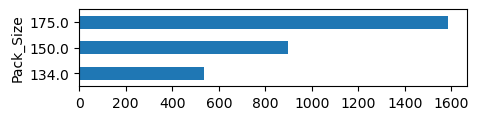

========== YOUNG SINGLES/COUPLES - Budget ==========
Pack_Size
134.0     832
150.0    1325
175.0    2262
Name: count, dtype: int64


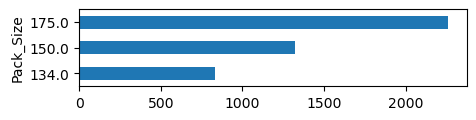

========== YOUNG SINGLES/COUPLES - Mainstream ==========
Pack_Size
134.0    2315
150.0    2998
175.0    4928
Name: count, dtype: int64


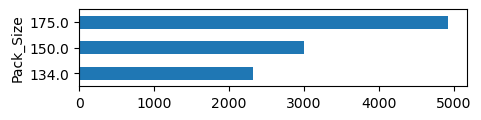

========== MIDAGE SINGLES/COUPLES - Premium ==========
Pack_Size
134.0     781
150.0    1163
175.0    2034
Name: count, dtype: int64


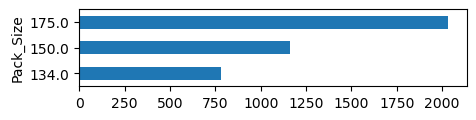

========== MIDAGE SINGLES/COUPLES - Budget ==========
Pack_Size
134.0     449
150.0     746
175.0    1256
Name: count, dtype: int64


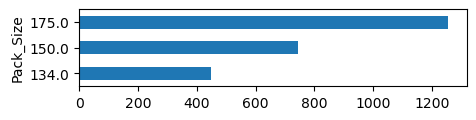

========== MIDAGE SINGLES/COUPLES - Mainstream ==========
Pack_Size
134.0    1159
150.0    1714
175.0    2912
Name: count, dtype: int64


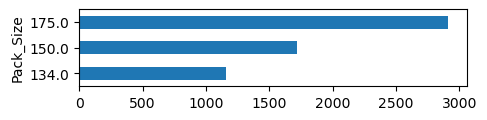

========== NEW FAMILIES - Premium ==========
Pack_Size
134.0    165
150.0    225
175.0    371
Name: count, dtype: int64


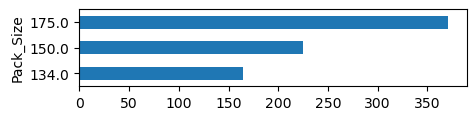

========== NEW FAMILIES - Budget ==========
Pack_Size
134.0    309
150.0    425
175.0    763
Name: count, dtype: int64


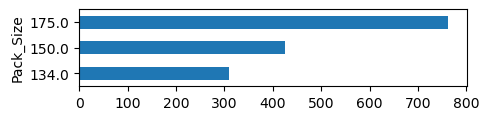

========== NEW FAMILIES - Mainstream ==========
Pack_Size
134.0    224
150.0    362
175.0    579
Name: count, dtype: int64


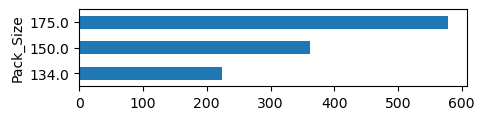

========== OLDER FAMILIES - Premium ==========
Pack_Size
134.0    1014
150.0    1607
175.0    2747
Name: count, dtype: int64


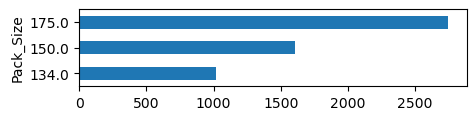

========== OLDER FAMILIES - Budget ==========
Pack_Size
134.0    1996
150.0    3414
175.0    5662
Name: count, dtype: int64


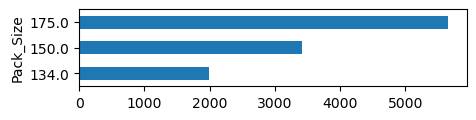

========== OLDER FAMILIES - Mainstream ==========
Pack_Size
134.0    1234
150.0    2091
175.0    3489
Name: count, dtype: int64


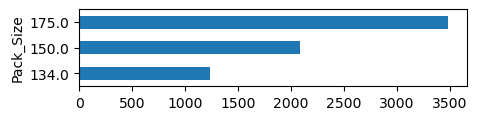

========== OLDER SINGLES/COUPLES - Premium ==========
Pack_Size
134.0    1744
150.0    2672
175.0    4382
Name: count, dtype: int64


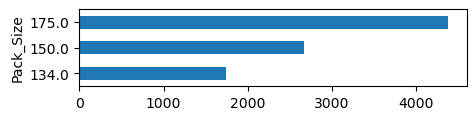

========== OLDER SINGLES/COUPLES - Budget ==========
Pack_Size
134.0    1843
150.0    2726
175.0    4535
Name: count, dtype: int64


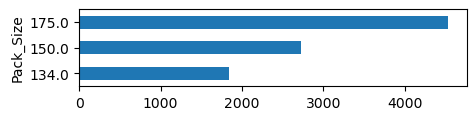

========== OLDER SINGLES/COUPLES - Mainstream ==========
Pack_Size
134.0    1720
150.0    2660
175.0    4422
Name: count, dtype: int64


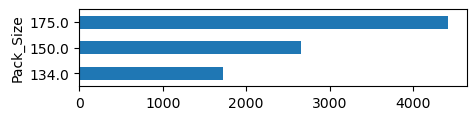

========== RETIREES - Premium ==========
Pack_Size
134.0    1331
150.0    1883
175.0    3232
Name: count, dtype: int64


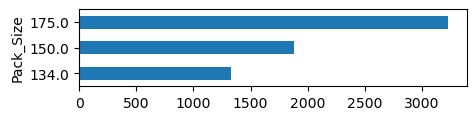

========== RETIREES - Budget ==========
Pack_Size
134.0    1517
150.0    2242
175.0    3768
Name: count, dtype: int64


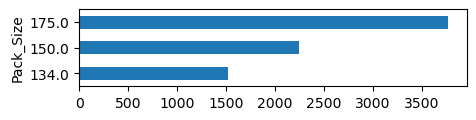

========== RETIREES - Mainstream ==========
Pack_Size
134.0    2103
150.0    3183
175.0    5187
Name: count, dtype: int64


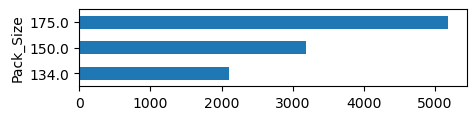

========== YOUNG FAMILIES - Premium ==========
Pack_Size
134.0    1007
150.0    1697
175.0    2926
Name: count, dtype: int64


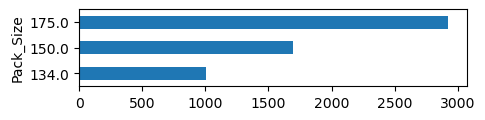

========== YOUNG FAMILIES - Budget ==========
Pack_Size
134.0    1674
150.0    2749
175.0    4800
Name: count, dtype: int64


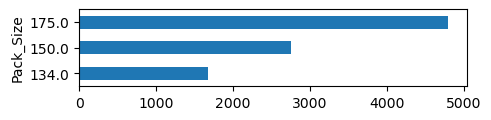

========== YOUNG FAMILIES - Mainstream ==========
Pack_Size
134.0    1148
150.0    1927
175.0    3087
Name: count, dtype: int64


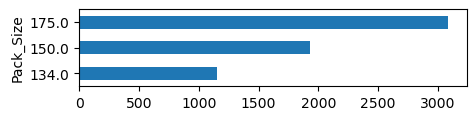

In [178]:
merged_pack = pd.concat([merged_data, pack_sizes.rename("Pack_Size")], axis=1)

for stage in merged_data["LIFESTAGE"].unique():
    for prem in merged_data["PREMIUM_CUSTOMER"].unique():
        print('==========',stage, '-', prem,'==========')
        summary = merged_pack[(merged_pack["LIFESTAGE"] == stage) & (merged_pack["PREMIUM_CUSTOMER"] == prem)]["Pack_Size"].value_counts().head(3).sort_index()
        print(summary)
        plt.figure()
        summary.plot.barh(figsize=(5,1))
        plt.show()

All of the segments prefer the 175gr pack size chips, followed by the 150gr size.

Next, let's find out average amount of chips bought per customer segment.

In [179]:
(temp.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"])["PROD_QTY"].sum() / temp.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"])["LYLTY_CARD_NBR"].nunique()).sort_values(ascending=False)

LIFESTAGE               PREMIUM_CUSTOMER
OLDER FAMILIES          Mainstream          9.255380
                        Budget              9.076773
                        Premium             9.071717
YOUNG FAMILIES          Budget              8.722995
                        Premium             8.716013
                        Mainstream          8.638361
OLDER SINGLES/COUPLES   Budget              6.781398
                        Premium             6.769543
                        Mainstream          6.712021
MIDAGE SINGLES/COUPLES  Mainstream          6.432080
RETIREES                Budget              6.141847
                        Premium             6.103358
MIDAGE SINGLES/COUPLES  Premium             6.078514
                        Budget              6.026459
RETIREES                Mainstream          5.925920
NEW FAMILIES            Mainstream          4.891566
                        Budget              4.821527
                        Premium             4.815652
YOUNG

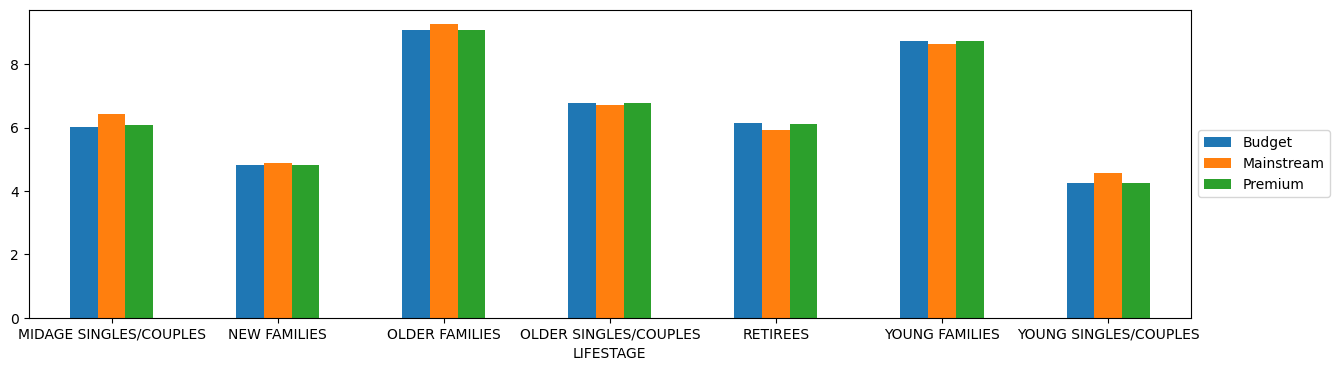

In [180]:
(temp.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"])["PROD_QTY"].sum() / temp.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"])["LYLTY_CARD_NBR"].nunique()).unstack().plot.bar(figsize=(15,4), rot=0)
plt.legend(loc="center left", bbox_to_anchor=(1.0, 0.5))
plt.savefig("Average purchase quantity per segment.png", bbox_inches="tight")

In [181]:
# Step 1: Calculate Unit_Price correctly
temp["Unit_Price"] = temp["TOT_SALES"] / temp["PROD_QTY"]

# Step 2: Ensure Unit_Price is numeric and remove non-numeric values if any
temp["Unit_Price"] = pd.to_numeric(temp["Unit_Price"], errors='coerce')  # Convert to numeric, coerce errors to NaN

# Step 3: Group by Segment and calculate mean of Unit_Price
average_price_by_segment = temp.groupby(["Segment"])["Unit_Price"].mean().sort_values(ascending=False)

# Step 4: Display the result
print(average_price_by_segment)


Segment
YOUNG SINGLES/COUPLES - Mainstream     4.065642
MIDAGE SINGLES/COUPLES - Mainstream    3.994241
RETIREES - Budget                      3.924404
RETIREES - Premium                     3.920942
NEW FAMILIES - Budget                  3.917688
NEW FAMILIES - Mainstream              3.916133
OLDER SINGLES/COUPLES - Premium        3.893182
OLDER SINGLES/COUPLES - Budget         3.882096
NEW FAMILIES - Premium                 3.872110
RETIREES - Mainstream                  3.844294
OLDER SINGLES/COUPLES - Mainstream     3.814665
MIDAGE SINGLES/COUPLES - Premium       3.770698
YOUNG FAMILIES - Premium               3.762150
YOUNG FAMILIES - Budget                3.760737
OLDER FAMILIES - Budget                3.745340
MIDAGE SINGLES/COUPLES - Budget        3.743328
OLDER FAMILIES - Mainstream            3.737077
YOUNG FAMILIES - Mainstream            3.724533
OLDER FAMILIES - Premium               3.717000
YOUNG SINGLES/COUPLES - Premium        3.665414
YOUNG SINGLES/COUPLES - Budget  

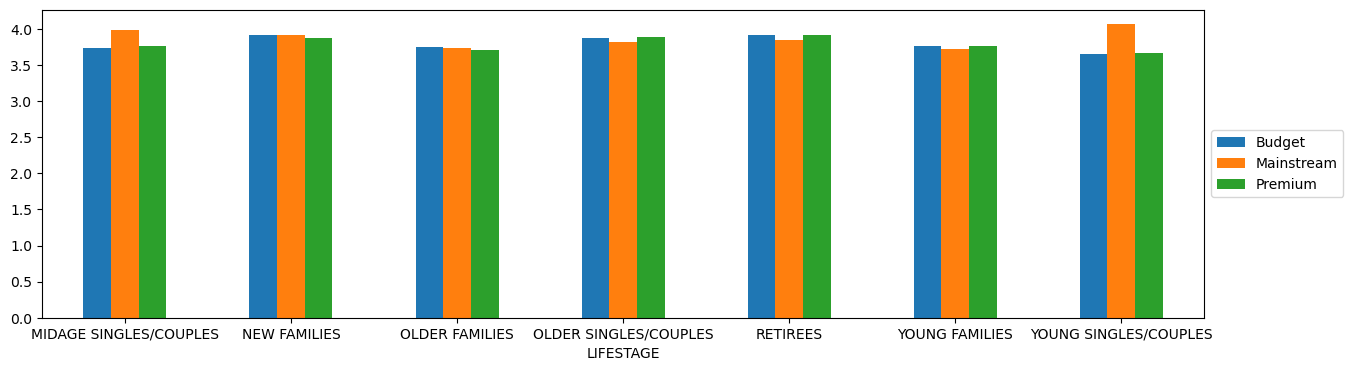

In [182]:
temp.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"])["Unit_Price"].mean().unstack().plot.bar(figsize=(15,4), rot=0)
plt.legend(loc="center left", bbox_to_anchor=(1,0.5))

# Insights

- Top 3 total sales contributor segment are

  - Older families (Budget) $156,864 
  
  - Young Singles/Couples (Mainstream) $147,582
  
  - Retirees (Mainstream) $145,169

- Young Singles/Couples (Mainstream) has the highest population, followed by Retirees (Mainstream). Which explains their high total sales.

- Despite Older Families not having the highest population, they have the highest frequency of purchase, which contributes to their high total sales.

- Older Families followed by Young Families has the highest average quantity of chips bought per purchase.

- The Mainstream category of the "Young and Midage Singles/Couples" have the highest spending of chips per purchase. And the difference to the non-Mainstream "Young and Midage Singles/Couples" are statistically significant.

- Chips brand Kettle is dominating every segment as the most purchased brand.

- Observing the 2nd most purchased brand, "Young and Midage Singles/Couples" is the only segment with a different preference (Doritos) as compared to others' (Smiths).

- Most frequent chip size purchased is 175gr followed by the 150gr chip size for all segments. 